In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_graph(arr, ylabel='L2 hitrate', xlabel='kernels (in-order)'):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    plt.tight_layout()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.plot(arr)

In [3]:
def plot_bar(arr, delimeter=91, ylabel='L2 hit-rate', xlabel='kernels (in-order)'):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    plt.tight_layout()
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.axvline(x=delimeter, color='r', linestyle='--')
    ax.bar(list(range(len(arr))), height=arr, width=1)

In [4]:
#model = 'resnet50'
#model = 'resnet152'
model = 'vgg16'

In [5]:
onegpu = pd.read_csv('./src/'+model+'/ncu_onegpu_entire.csv')

In [6]:
legend = {
    'L1-2 hitrate':'lts__t_sector_hit_rate.pct',
    'L1-2 read hitrate':'lts__t_sector_op_read_hit_rate.pct',
    'L1-2 read transactions':'lts__t_sectors_srcunit_tex_op_read.sum',
    'L2 read transactions':'lts__t_sectors_op_read.sum+lts__t_sectors_op_atom.sum+lts__t_sectors_op_red.sum',
    'L1 hitrate':'l1tex__t_sector_hit_rate.pct',
    'L1 transactions':'l1tex__lsu_writeback_active.avg.pct_of_peak_sustained_active+l1tex__tex_writeback_active.avg.pct_of_peak_sustained_active',
    'L2 utilization':'lts__t_sectors.avg.pct_of_peak_sustained_elapsed'
}

In [7]:
# onegpu.loc[onegpu['Kernel Name'].str.contains('volta_sgemm_128x32_sliced1x4_tn',case=False)]
# onegpu.loc[onegpu['ID']==123]

In [8]:
def get_data(df, legend):
    length = df['ID'].max()+1

    n = len(legend.keys())

    ids = list(range(length))
    names = list(legend.keys())
    data = {}

    for i in range(n):
        name = names[i]
        metric = legend[name]
        d = np.zeros(length)
        for j in ids:
            d[j] = df.loc[(df['ID']==j) & (df['Metric Name']==metric)]['Metric Value'].to_numpy()[0]
        data[name] = d 
    return data

In [9]:
def leave_relevant(data, delimeters = [91,123]):
    for key in data.keys():
        data[key] = np.delete(data[key], list(range(delimeters[0], delimeters[1])))
    return data

In [10]:
data = get_data(onegpu,legend)

In [11]:
data = leave_relevant(data)

In [ ]:
# 'L1-2 hitrate'
# 'L1-2 read hitrate'
# 'L1-2 read transactions'
# 'L2 read transactions'
# 'L1 hitrate'
# 'L1 transactions'
# 'L2 utilization'

In [12]:
target = 'L1-2 read hitrate'

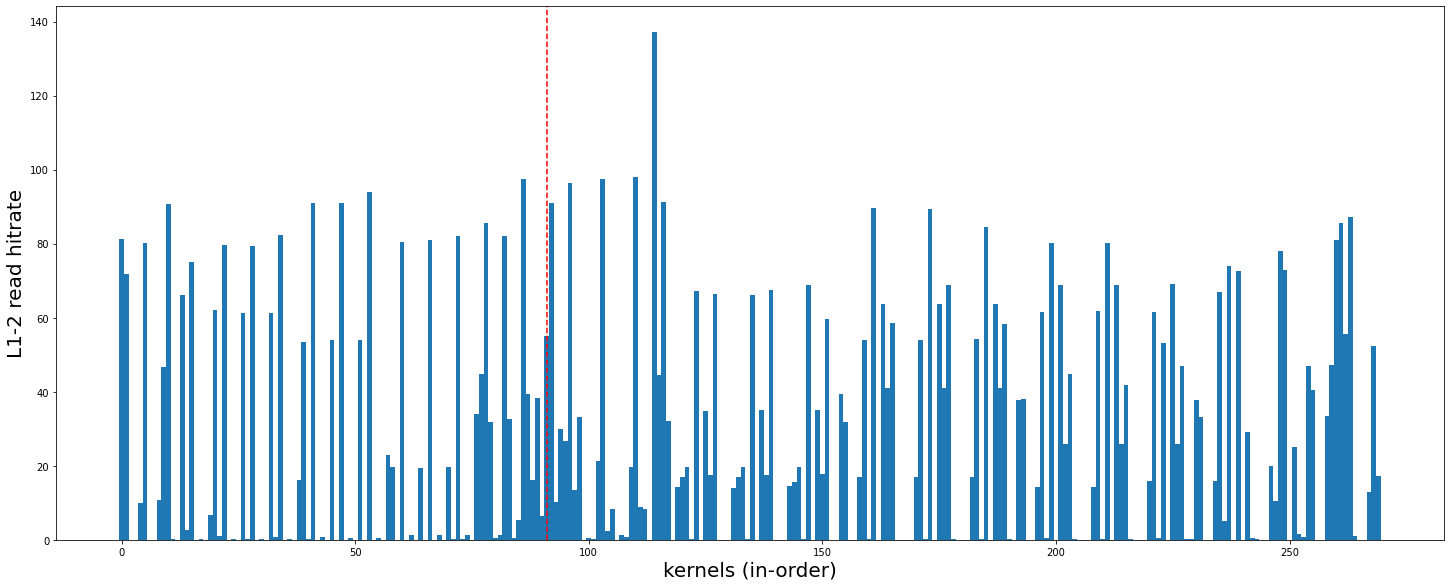

In [13]:
plot_bar(data[target], ylabel=target)

In [ ]:
hitrates = data['L1-2 read hitrate']
trans = data['L1-2 read transactions']

In [ ]:
fwd_hr = hitrates[:92]
bwd_hr = hitrates[92:]

fwd_tr = trans[:92]
bwd_tr = trans[92:]

In [ ]:
fwd_hr = fwd_hr[fwd_tr!=0]
bwd_hr = bwd_hr[bwd_tr!=0]

In [ ]:
fwd_hr.mean()

In [ ]:
bwd_hr.mean()